In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
df = pd.read_csv('data/esewa_airlines.csv', index_col=False)

In [4]:
df.rename(columns={'last_modified_date': 'date'}, inplace=True)
data = df
time_series=df

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
data.columns

Index(['account_id', 'date', 'travelled_flight_name', 'total_amount'], dtype='object')

In [9]:
data.head()

,account_id,date,travelled_flight_name,total_amount
0,1.559470e+19,2023-10-11,BUDDHA AIR,6400.0
1,2.693080e+18,2023-10-11,BUDDHA AIR,5200.0
2,7.494540e+18,2023-10-11,SHREE AIRLINES,8800.0
3,1.493320e+19,2023-10-11,BUDDHA AIR,9001.0
4,1.682070e+19,2023-10-11,YETI AIRLINES,23200.0


In [10]:
data.describe()

,account_id,date,total_amount
count,1.048575e+06,1048575,1.048575e+06
mean,9.211738e+18,2023-09-10 09:46:01.502039296,7.351625e+03
min,6.630750e+12,2023-01-01 00:00:00,4.000000e+02
25%,4.560970e+18,2023-05-15 00:00:00,4.600000e+03
50%,9.221060e+18,2023-09-07 00:00:00,5.900000e+03
75%,1.383160e+19,2023-12-28 00:00:00,8.340000e+03
max,1.844670e+19,2024-05-06 00:00:00,1.109600e+05
std,5.330520e+18,NaN,4.350226e+03


In [11]:
data.count()

account_id               1048575
date                     1048575
travelled_flight_name    1048575
total_amount             1048575
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   account_id             1048575 non-null  float64       
 1   date                   1048575 non-null  datetime64[ns]
 2   travelled_flight_name  1048575 non-null  object        
 3   total_amount           1048575 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 32.0+ MB


In [13]:
data.count()

account_id               1048575
date                     1048575
travelled_flight_name    1048575
total_amount             1048575
dtype: int64

In [14]:
data.nunique()

account_id               211509
date                        479
travelled_flight_name         9
total_amount               4690
dtype: int64

In [15]:
data.account_id.value_counts()

account_id
5.723650e+17    1595
4.256250e+18     918
8.214720e+18     906
9.428670e+18     895
1.447140e+19     753
                ... 
8.501080e+18       1
8.609990e+18       1
5.872820e+18       1
5.381240e+18       1
1.340140e+19       1
Name: count, Length: 211509, dtype: int64

## calculate recency

In [16]:
data.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: date
Non-Null Count    Dtype         
--------------    -----         
1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.0 MB


In [17]:
data['recency'] = (datetime.now().date() - data['date'].dt.date)

## calculating frequency

In [18]:
frequency = data.groupby('account_id')['date'].count().reset_index()
frequency.rename(columns={'date':'frequency'}, inplace=True)
data = data.merge(frequency, on='account_id', how='left')
data

,account_id,date,travelled_flight_name,total_amount,recency,frequency
0,1.559470e+19,2023-10-11,BUDDHA AIR,6400.0,"211 days, 0:00:00",43
1,2.693080e+18,2023-10-11,BUDDHA AIR,5200.0,"211 days, 0:00:00",11
2,7.494540e+18,2023-10-11,SHREE AIRLINES,8800.0,"211 days, 0:00:00",3
3,1.493320e+19,2023-10-11,BUDDHA AIR,9001.0,"211 days, 0:00:00",27
4,1.682070e+19,2023-10-11,YETI AIRLINES,23200.0,"211 days, 0:00:00",17
...,...,...,...,...,...,...
1048570,6.846850e+18,2023-08-07,BUDDHA AIR,5000.0,"276 days, 0:00:00",1
1048571,1.029540e+19,2023-08-07,BUDDHA AIR,5000.0,"276 days, 0:00:00",7
1048572,1.340140e+19,2023-08-07,BUDDHA AIR,4200.0,"276 days, 0:00:00",1
1048573,6.879000e+18,2023-08-07,YETI AIRLINES,9200.0,"276 days, 0:00:00",4


## calculating monetary value

In [19]:
monetary_data = data.groupby('account_id')['total_amount'].sum().reset_index()
monetary_data.rename(columns={'total_amount':'monetary_value'}, inplace=True)
data = data.merge(monetary_data, on='account_id', how='left')
data

,account_id,date,travelled_flight_name,total_amount,recency,frequency,monetary_value
0,1.559470e+19,2023-10-11,BUDDHA AIR,6400.0,"211 days, 0:00:00",43,336363.00
1,2.693080e+18,2023-10-11,BUDDHA AIR,5200.0,"211 days, 0:00:00",11,71998.46
2,7.494540e+18,2023-10-11,SHREE AIRLINES,8800.0,"211 days, 0:00:00",3,41900.00
3,1.493320e+19,2023-10-11,BUDDHA AIR,9001.0,"211 days, 0:00:00",27,189483.00
4,1.682070e+19,2023-10-11,YETI AIRLINES,23200.0,"211 days, 0:00:00",17,146382.31
...,...,...,...,...,...,...,...
1048570,6.846850e+18,2023-08-07,BUDDHA AIR,5000.0,"276 days, 0:00:00",1,5000.00
1048571,1.029540e+19,2023-08-07,BUDDHA AIR,5000.0,"276 days, 0:00:00",7,39547.00
1048572,1.340140e+19,2023-08-07,BUDDHA AIR,4200.0,"276 days, 0:00:00",1,4200.00
1048573,6.879000e+18,2023-08-07,YETI AIRLINES,9200.0,"276 days, 0:00:00",4,34199.98


In [24]:
new_freq = pd.qcut(frequency.account_id, q=10)
new_freq

0         (6630749999999.999, 1.3841959999999997e+18]
1         (6630749999999.999, 1.3841959999999997e+18]
2         (6630749999999.999, 1.3841959999999997e+18]
3         (6630749999999.999, 1.3841959999999997e+18]
4         (6630749999999.999, 1.3841959999999997e+18]
                             ...                     
211504          (1.5762420000000002e+19, 1.84467e+19]
211505          (1.5762420000000002e+19, 1.84467e+19]
211506          (1.5762420000000002e+19, 1.84467e+19]
211507          (1.5762420000000002e+19, 1.84467e+19]
211508          (1.5762420000000002e+19, 1.84467e+19]
Name: account_id, Length: 211509, dtype: category
Categories (10, interval[float64, right]): [(6630749999999.999, 1.3841959999999997e+18] < (1.3841959999999997e+18, 2.8470700000000005e+18] < (2.8470700000000005e+18, 4.3279700000000005e+18] < (4.3279700000000005e+18, 5.790942e+18] ... (8.747506e+18, 1.0397859999999998e+19] < (1.0397859999999998e+19, 1.3076280000000004e+19] < (1.3076280000000004e+19, 1.57

In [22]:
frequency.head()

,account_id,frequency
0,6.630750e+12,2
1,9.564960e+12,1
2,2.564860e+13,2
3,6.785860e+13,1
4,7.441550e+13,1


# time series analysis

In [91]:
avg_counts = df.groupby(['account_id'])['total_amount'].agg(['sum', 'count'])
# data['avg_counts'] = avg_counts['sum']/avg_counts['count']

In [92]:
avg_counts

,sum,count
account_id,,
6.630750e+12,8200.00,2
9.564960e+12,4400.00,1
2.564860e+13,7790.00,2
6.785860e+13,7900.00,1
7.441550e+13,7400.00,1
...,...,...
1.844620e+19,6200.00,1
1.844640e+19,13200.00,3
1.844650e+19,4500.00,1


In [93]:
average_amount = df.groupby('account_id')['total_amount'].mean()
df['average_amount'] = average_amount

In [94]:
average_amount = df.groupby('account_id')['total_amount'].mean().reset_index()
average_amount

,account_id,total_amount
0,6.630750e+12,4100.000
1,9.564960e+12,4400.000
2,2.564860e+13,3895.000
3,6.785860e+13,7900.000
4,7.441550e+13,7400.000
...,...,...
211504,1.844620e+19,6200.000
211505,1.844640e+19,4400.000
211506,1.844650e+19,4500.000
211507,1.844660e+19,8040.144


In [95]:
df['avg'] = average_amount['total_amount']

In [96]:
data1 = df.merge(average_amount,how='left',on='account_id')

In [97]:
del data1['average_amount']
del data1['avg']

In [98]:
data1.head()

,Unnamed: 0,account_id,last_modified_date,travelled_flight_name,total_amount_x,total_amount_y
0,0,1.559470e+19,10/11/2023,BUDDHA AIR,6400.0,7822.395349
1,1,2.693080e+18,10/11/2023,BUDDHA AIR,5200.0,6545.314545
2,2,7.494540e+18,10/11/2023,SHREE AIRLINES,8800.0,13966.666667
3,3,1.493320e+19,10/11/2023,BUDDHA AIR,9001.0,7017.888889
4,4,1.682070e+19,10/11/2023,YETI AIRLINES,23200.0,8610.724118


In [99]:
df.isna().sum()

Unnamed: 0                     0
account_id                     0
last_modified_date             0
travelled_flight_name          0
total_amount                   0
average_amount           1048575
avg                       837066
dtype: int64

In [100]:
df.head()

,Unnamed: 0,account_id,last_modified_date,travelled_flight_name,total_amount,average_amount,avg
0,0,1.559470e+19,10/11/2023,BUDDHA AIR,6400.0,NaN,4100.0
1,1,2.693080e+18,10/11/2023,BUDDHA AIR,5200.0,NaN,4400.0
2,2,7.494540e+18,10/11/2023,SHREE AIRLINES,8800.0,NaN,3895.0
3,3,1.493320e+19,10/11/2023,BUDDHA AIR,9001.0,NaN,7900.0
4,4,1.682070e+19,10/11/2023,YETI AIRLINES,23200.0,NaN,7400.0


In [101]:
df.count()

Unnamed: 0               1048575
account_id               1048575
last_modified_date       1048575
travelled_flight_name    1048575
total_amount             1048575
average_amount                 0
avg                       211509
dtype: int64

In [102]:
df.nunique()

Unnamed: 0               1048575
account_id                211509
last_modified_date           479
travelled_flight_name          9
total_amount                4690
average_amount                 0
avg                        61647
dtype: int64

In [28]:
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot: >

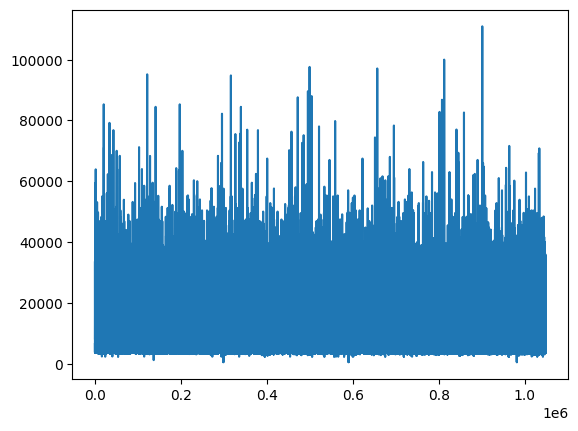

In [29]:
df.total_amount.plot()

In [30]:
time_series.set_index('date', inplace=True)

In [31]:
# memory allocation error 
# indicates that there is insufficient memory available to allocate an array with the specified shape and data type (float64).

# sts.adfuller(df.total_amount)

In [32]:
# for tackling the insufficient memory problem

chunk_size = 100000  # Adjust this based on your available memory
num_chunks = len(df) // chunk_size + 1

for chunk_idx in range(num_chunks):
    chunk = time_series.iloc[chunk_idx * chunk_size : (chunk_idx + 1) * chunk_size]
    adf_result = sts.adfuller(chunk['total_amount'])
    print(f"Chunk {chunk_idx+1}: ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")

Chunk 1: ADF Statistic: -24.731858160301595, p-value: 0.0
Chunk 2: ADF Statistic: -26.02239530641757, p-value: 0.0
Chunk 3: ADF Statistic: -23.838501232407904, p-value: 0.0
Chunk 4: ADF Statistic: -25.340460122144624, p-value: 0.0
Chunk 5: ADF Statistic: -25.16086950150852, p-value: 0.0
Chunk 6: ADF Statistic: -26.240415883091462, p-value: 0.0
Chunk 7: ADF Statistic: -28.687774777525867, p-value: 0.0
Chunk 8: ADF Statistic: -26.42318180596542, p-value: 0.0
Chunk 9: ADF Statistic: -27.163477750400723, p-value: 0.0
Chunk 10: ADF Statistic: -27.60382730382255, p-value: 0.0
Chunk 11: ADF Statistic: -21.32654904281314, p-value: 0.0


In [33]:
adf_result

(-21.32654904281314,
 0.0,
 57,
 48517,
 {'1%': -3.430484790815911,
  '5%': -2.861599574732267,
  '10%': -2.5668017096666578},
 948942.2733072997)

In [36]:
time_series.index

DatetimeIndex(['2023-10-11', '2023-10-11', '2023-10-11', '2023-10-11',
               '2023-10-11', '2023-10-11', '2023-10-11', '2023-10-11',
               '2023-10-11', '2023-10-11',
               ...
               '2023-08-07', '2023-08-07', '2023-08-07', '2023-08-07',
               '2023-08-07', '2023-08-07', '2023-08-07', '2023-08-07',
               '2023-08-07', '2023-08-07'],
              dtype='datetime64[ns]', name='date', length=1048575, freq=None)

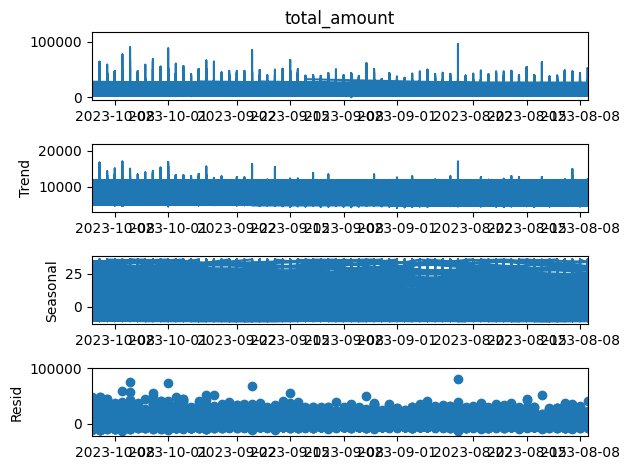

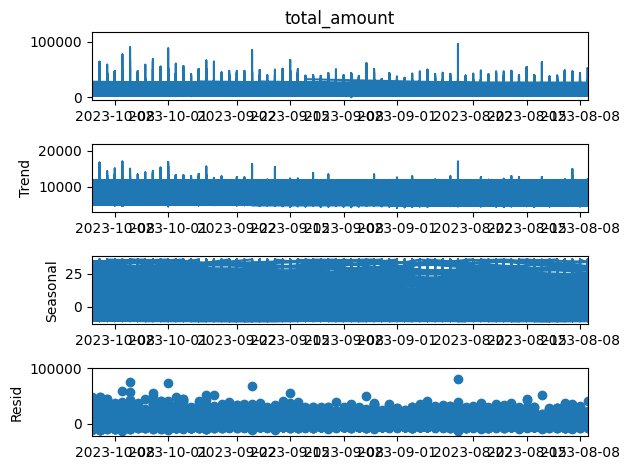

In [44]:
# seasonality
# a period has to be defined or DatetimeIndex with a freq not set to None
s_dec_additive = seasonal_decompose(time_series.total_amount, model='additive', period=12)
s_dec_additive.plot()

Text(0.5, 1.0, 'ACF')

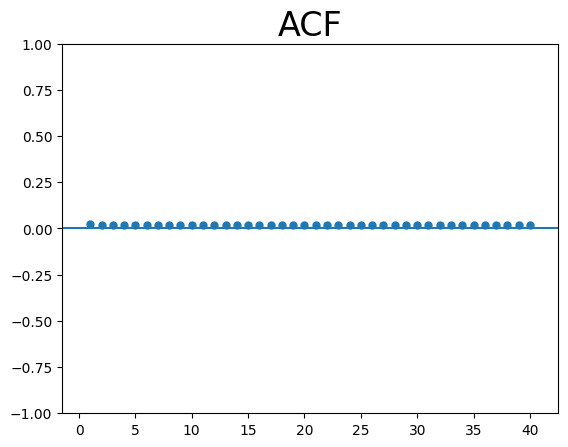

In [45]:
sgt.plot_acf(time_series.total_amount, lags=40, zero=False)
plt.title('ACF', size=24)

## ARIMA model

In [47]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

In [48]:
# moving average model

model_ar = ARIMA(time_series['total_amount'], order=(0,1,0))
results_ar = model_ar.fit()
results_ar.summary()

B:\environments\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\environments\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\environments\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\environments\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\environments\pyfinance\lib\

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_amount   No. Observations:              1048575
Model:                 ARIMA(0, 1, 0)   Log Likelihood           -10624294.945
Date:                Thu, 09 May 2024   AIC                       21248591.891
Time:                        10:03:35   BIC                       21248603.754
Sample:                             0   HQIC                      21248595.149
                            - 1048575                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        3.7e+07   2.23e+04   1656.122      0.000     3.7e+07     3.7e+07
===================================================================================
Ljung-Box (L1) (Q):              261392.44   Jarque-Bera (JB):           3129018.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model_ar2 = ARIMA(time_series['total_amount'], order=(0,1,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

B:\environments\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\environments\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\environments\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\environments\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
B:\environments\pyfinance\lib\

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_amount   No. Observations:              1048575
Model:                 ARIMA(0, 1, 0)   Log Likelihood           -10624294.945
Date:                Thu, 09 May 2024   AIC                       21248591.891
Time:                        10:11:34   BIC                       21248603.754
Sample:                             0   HQIC                      21248595.149
                            - 1048575                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        3.7e+07   2.23e+04   1656.122      0.000     3.7e+07     3.7e+07
===================================================================================
Ljung-Box (L1) (Q):              261392.44   Jarque-Bera (JB):           3129018.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LLR test

In [50]:
def llr_test(mod1, mod2, DF=1):
    l1 = mod1.fit().llf
    l2 = mod2.fit().llf
    LR = (2*(l2-l1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [52]:
llr_test(model_ar, model_ar2)

1.0